In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
#Mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/1.01. Simple linear regression.csv')

In [ ]:
#Load the first 5 rows of the dataset
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [ ]:
#Load the last 5 rows of the dataset(optional)
df.tail()

,SAT,GPA
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76
83,2050,3.81


In [ ]:
#Get summary statistics
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [ ]:
x = df.SAT #independent variable
y = df.GPA #dependent variable
mean_x = np.mean(x)
mean_y = np.mean(y)

# Calculate standard deviations
sd_x = np.std(x, ddof=1)
sd_y = np.std(y, ddof=1)

# Calculate correlation
correlation = np.corrcoef(x, y)[0, 1]

# Calculate slope (b1) using the formula: b1 = (correlation * sd_y) / sd_X
slope = (correlation * sd_y) / sd_x

# Calculate intercept (b0) using the formula: b0 = mean_y - slope * mean_X
intercept = mean_y - slope * mean_x

# Print the slope and intercept
print(f"Slope (b1): {slope}")
print(f"Intercept (b0): {intercept}")

Slope (b1): 0.0016556880500928155
Intercept (b0): 0.2750402996602772


In [ ]:
# Create and train the model
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

# Make predictions (replace with your desired SAT score)
new_SAT_score = 1500
predicted_GPA = model.predict([[new_SAT_score]])

# Print the prediction
print(f"Predicted GPA for SAT score {new_SAT_score}: {predicted_GPA[0]}")

Predicted GPA for SAT score 1500: 2.7585723747995012


In [ ]:
# Predict gpa for multiple sat scores

# Predict GPA for multiple SAT scores
sat_scores = [1600, 1400, 1300, 1700]  # Example SAT scores
predicted_gpas = model.predict([[score] for score in sat_scores])

# Print the predictions
for score, gpa in zip(sat_scores, predicted_gpas):
    print(f"Predicted GPA for SAT score {score}: {gpa}")


Predicted GPA for SAT score 1600: 2.9241411798087826
Predicted GPA for SAT score 1400: 2.59300356979022
Predicted GPA for SAT score 1300: 2.4274347647809384
Predicted GPA for SAT score 1700: 3.089709984818064


In [ ]:
# Calculate the r2 value

from sklearn.metrics import r2_score

# Make predictions on the entire dataset
y_pred = model.predict(x.values.reshape(-1, 1))

# Calculate R-squared
r2 = r2_score(y, y_pred)

print(f"R-squared: {r2}")


R-squared: 0.40600391479679754


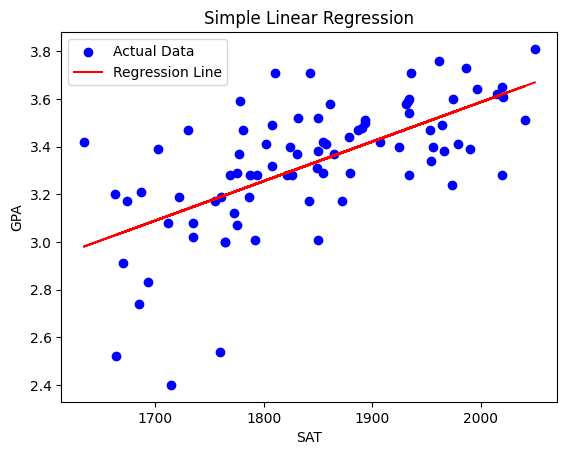

In [ ]:
# Plot actual data and regression line
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('SAT')  # label 'SAT'
plt.ylabel('GPA')  # label 'GPA'
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [ ]:
# Line equation

# Equation of the line: y = b0 + b1*x
print(f"The equation of the regression line is: GPA = {intercept:.4f} + {slope:.4f} * SAT")


The equation of the regression line is: GPA = 0.2750 + 0.0017 * SAT
